# Car Price Prediction using python.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import joblib

In [17]:
df=pd.read_csv("D:\\Phase1_learning\\Car price Prediction\\car data.xls")

### 1. Display Top 5 Rows of The Dataset

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 2. Check Last 5 Rows of The Dataset

In [19]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [20]:
df.shape

(301, 9)

In [21]:
print("Number of rows in the dataset:",df.shape[0])
print("Number of columns in the dataset:",df.shape[1])

Number of rows in the dataset: 301
Number of columns in the dataset: 9


### 4. Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### 5. Check Null Values In The Dataset

In [23]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### 6. Get Overall Statistics About The Dataset


In [24]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 7. Data Preprocessing

In [25]:
df.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [26]:
import datetime
date_time=datetime.datetime.now()

In [27]:
df["Age"]=date_time.year - df['Year']

In [28]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [29]:
df.drop(["Year"],axis=1,inplace=True)

# outlier removal

<Axes: >

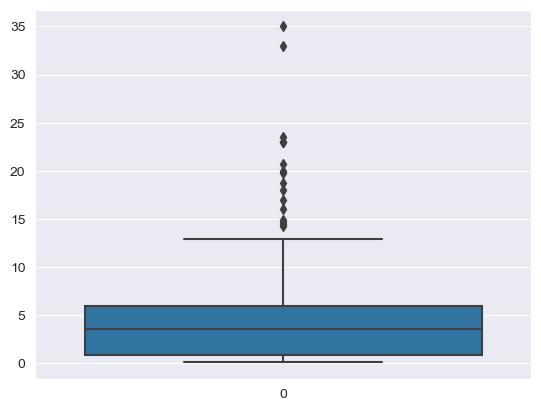

In [30]:
import seaborn as sns
sns.boxplot(df['Selling_Price'])

In [31]:
sorted(df['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [32]:
df= df[~(df['Selling_Price']>=33.0) & (df['Selling_Price']<=35.0)]

In [33]:
df.shape

(299, 9)

### Encoding the Categorical Columns

In [34]:
df.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [35]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [36]:
df=df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}})

In [37]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [38]:
df=df.replace({'Seller_Type':{'Dealer':0,'Individual':1}})

In [39]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [40]:
df=df.replace({'Transmission':{'Manual':0,'Automatic':1}})

In [41]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10


### 8. Store Feature Matrix In X and Response(Target) In Vector y

In [42]:
x= df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [43]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

### 9. Splitting The Dataset Into The Training Set And Test Set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

### 10. Import The models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### 11. Model Training

In [50]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)

xgb=GradientBoostingRegressor()
xgb.fit(x_train,y_train)

xg= XGBRegressor()
xg.fit(x_train,y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 12. Prediction on Test Data

In [51]:
y_pred1=lr.predict(x_test)
y_pred2=rf.predict(x_test)
y_pred3=xgb.predict(x_test)
y_pred4=xg.predict(x_test)

### 13. Evaluating the Algorithm

In [52]:
from sklearn import metrics

In [53]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [54]:
print(score1,score2,score3,score4)

0.6790884983129408 0.7303547097841316 0.8677866677180974 0.8887471822279068


# saving the model

In [55]:
final_data= pd.DataFrame({'Models':['Linear Regression','Random Forest','Gradient Boosting','XGBoost'],
                         "R2_Score":[score1,score2,score3,score4]} )

In [56]:
final_data

,Models,R2_Score
0,Linear Regression,0.679088
1,Random Forest,0.730355
2,Gradient Boosting,0.867787
3,XGBoost,0.888747


<Axes: xlabel='Models', ylabel='R2_Score'>

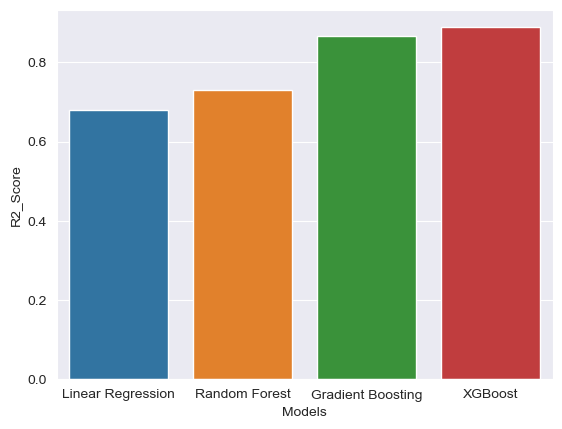

In [57]:
sns.barplot(x='Models',y='R2_Score',data=final_data)

### 14. Save The Model

In [58]:
xg= XGBRegressor()
xg_final= xg.fit(x_train,y_train)

In [59]:
joblib.dump(xg_final,'D:\\Phase1_learning\\Car price Prediction\\car_price_prediction_model.pkl')

['D:\\Phase1_learning\\Car price Prediction\\car_price_prediction_model.pkl']

In [60]:
model= joblib.load('D:\\Phase1_learning\\Car price Prediction\\car_price_prediction_model.pkl')

In [61]:
data_new= pd.DataFrame({'Present_Price':6.79,'Kms_Driven':16000,'Fuel_Type':0,'Seller_Type':0,'Transmission':1,'Owner':0,'Age':5},index=[0])

### 15. Prediction on New Data

In [62]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8
},index=[0])

In [63]:
model.predict(data_new)

array([3.6266255], dtype=float32)